imports

In [1]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn import set_config; set_config(display = "diagram")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

### Load Data

In [3]:
data = pd.read_csv('../raw_data/brain_proteomics_data.csv')
data.head()

,Case,years_to_birth,gender,histological_type,race,ethnicity,radiation_therapy,Grade,Mutation.Count,Percent.aneuploidy,...,p27_p,p27_pT157_p,p27_pT198_p,p38_pT180_Y182_p,p53_p,p62-LCK-ligand_p,p70S6K_p,p70S6K_pT389_p,p90RSK_p,p90RSK_pT359_S363_p
0,TCGA-CS-4938,31,female,astrocytoma,white,not hispanic or latino,no,G2,15,0.069412,...,-0.425127,-0.033398,0.289192,1.060163,-0.407456,-0.470354,-0.107559,-0.060441,-0.053104,-0.011132
1,TCGA-CS-6665,51,female,astrocytoma,white,not hispanic or latino,yes,G3,75,0.524814,...,0.076536,0.011809,-0.047973,-0.054275,-0.244020,0.106282,-0.034369,0.585072,0.431720,-0.201412
2,TCGA-CS-6666,22,male,astrocytoma,white,not hispanic or latino,yes,G3,18,0.403165,...,0.110268,0.066886,-0.066150,0.250434,0.432187,-0.210412,0.290949,-0.893383,-0.693677,-0.055250
3,TCGA-DB-5270,38,female,oligoastrocytoma,white,not hispanic or latino,no,G3,16,0.061382,...,-0.235321,0.015372,-0.127422,-1.190789,0.105396,0.218569,-0.099136,1.990618,0.166788,-0.235380
4,TCGA-DB-5273,33,male,astrocytoma,white,not hispanic or latino,yes,G3,16,0.017349,...,-0.343212,-0.250564,-0.234582,0.648598,-0.071851,-0.041811,-0.099300,-0.920359,-0.243159,-0.128841


In [4]:
data.iloc[:,:15].head()

,Case,years_to_birth,gender,histological_type,race,ethnicity,radiation_therapy,Grade,Mutation.Count,Percent.aneuploidy,IDH.status,outcome,14-3-3_beta_p,14-3-3_epsilon_p,14-3-3_zeta_p
0,TCGA-CS-4938,31,female,astrocytoma,white,not hispanic or latino,no,G2,15,0.069412,Mutant,1,0.026223,0.250940,-0.080954
1,TCGA-CS-6665,51,female,astrocytoma,white,not hispanic or latino,yes,G3,75,0.524814,Mutant,1,-0.002637,-0.340954,0.180070
2,TCGA-CS-6666,22,male,astrocytoma,white,not hispanic or latino,yes,G3,18,0.403165,Mutant,1,-0.071522,-0.288344,0.608584
3,TCGA-DB-5270,38,female,oligoastrocytoma,white,not hispanic or latino,no,G3,16,0.061382,Mutant,1,0.119700,0.269015,0.682819
4,TCGA-DB-5273,33,male,astrocytoma,white,not hispanic or latino,yes,G3,16,0.017349,Mutant,1,0.131162,0.086974,0.016835


In [5]:
data['outcome']

0      1
1      1
2      1
3      1
4      1
      ..
301    1
302    0
303    0
304    1
305    0
Name: outcome, Length: 306, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Columns: 186 entries, Case to p90RSK_pT359_S363_p
dtypes: float64(175), int64(3), object(8)
memory usage: 444.8+ KB


In [7]:
data.describe()

,years_to_birth,Mutation.Count,Percent.aneuploidy,outcome,14-3-3_beta_p,14-3-3_epsilon_p,14-3-3_zeta_p,4E-BP1_p,4E-BP1_pS65_p,4E-BP1_pT37_T46_p,...,p27_p,p27_pT157_p,p27_pT198_p,p38_pT180_Y182_p,p53_p,p62-LCK-ligand_p,p70S6K_p,p70S6K_pT389_p,p90RSK_p,p90RSK_pT359_S363_p
count,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,...,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000
mean,43.607843,28.009804,0.132947,0.601307,0.019826,0.072282,0.069640,0.028028,0.057618,0.052389,...,0.072065,-0.005890,0.024018,0.031872,0.024308,0.014535,-0.027670,0.097176,-0.004954,0.000182
std,13.126489,14.908791,0.127883,0.490431,0.209680,0.239839,0.413425,0.262063,0.260887,0.637903,...,0.324511,0.122025,0.148226,0.382141,0.256175,0.287693,0.207015,0.871885,0.245806,0.180561
min,14.000000,0.000000,0.000006,0.000000,-0.398777,-0.680385,-0.901789,-0.722812,-0.490859,-1.691028,...,-0.738729,-0.299474,-0.313354,-1.190789,-0.942777,-0.692843,-1.748935,-1.907725,-0.929916,-0.481472
25%,33.000000,18.000000,0.053388,0.000000,-0.095497,-0.069781,-0.197243,-0.150643,-0.118454,-0.347277,...,-0.131287,-0.072352,-0.059653,-0.175519,-0.110476,-0.133928,-0.123099,-0.505027,-0.140920,-0.120984
50%,41.000000,24.000000,0.097433,1.000000,-0.007656,0.044880,0.006965,0.000725,0.016828,0.087880,...,0.036695,-0.020487,0.004104,0.047885,0.010180,-0.003165,-0.020563,-0.000169,0.006578,-0.013234
75%,53.000000,37.000000,0.163198,1.000000,0.083242,0.217087,0.272758,0.170646,0.184088,0.498722,...,0.222187,0.048010,0.082467,0.257276,0.170945,0.164749,0.081472,0.664052,0.150887,0.108412
max,86.000000,85.000000,0.821253,1.000000,1.045979,0.898890,1.913847,0.996580,1.126463,1.745698,...,1.606446,0.952113,0.809578,1.295985,1.660156,2.932249,0.694476,2.898134,0.724000,0.695240


In [8]:
round(data.outcome.value_counts(normalize = True),4)

outcome
1    0.6013
0    0.3987
Name: proportion, dtype: float64

<Axes: xlabel='years_to_birth', ylabel='Count'>

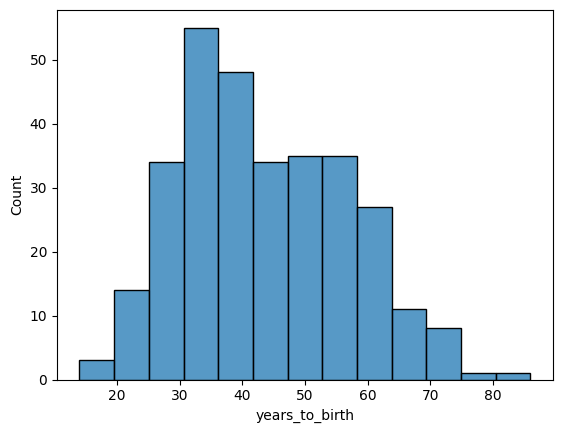

In [9]:
sns.histplot(data['years_to_birth'])

<Axes: xlabel='Mutation.Count', ylabel='Count'>

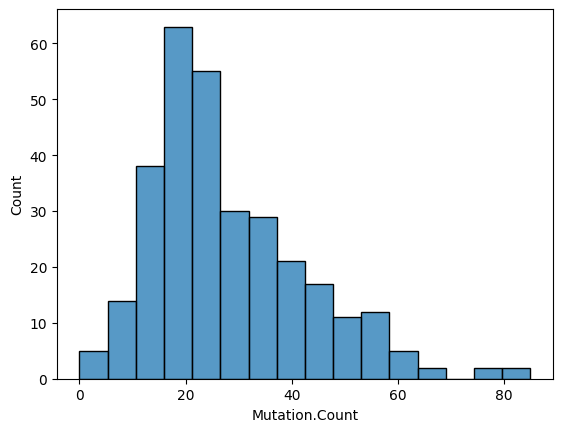

In [10]:
sns.histplot(data['Mutation.Count'])

## Define X and Y

In [11]:
X= data.iloc[:, 12:179]
X

,14-3-3_beta_p,14-3-3_epsilon_p,14-3-3_zeta_p,4E-BP1_p,4E-BP1_pS65_p,4E-BP1_pT37_T46_p,4E-BP1_pT70_p,53BP1_p,A-Raf_pS299_p,ACC1_p,...,eEF2_p,eEF2K_p,eIF4E_p,eIF4G_p,mTOR_p,mTOR_pS2448_p,p21_p,p27_p,p27_pT157_p,p27_pT198_p
0,0.026223,0.250940,-0.080954,-0.420471,-0.090392,0.000000,-0.808518,-1.003871,-0.053652,-0.145543,...,-0.659474,-0.566975,0.068511,-0.843388,0.225940,0.843419,-0.702808,-0.425127,-0.033398,0.289192
1,-0.002637,-0.340954,0.180070,0.022611,-0.081000,0.100052,0.161428,-0.557812,-0.221878,-0.849298,...,0.079023,-0.233751,0.128974,-0.058118,0.000000,0.547091,-0.199547,0.076536,0.011809,-0.047973
2,-0.071522,-0.288344,0.608584,0.233311,-0.116463,0.182052,0.243324,0.256262,-0.330152,-0.130743,...,1.121871,0.441162,-0.051401,0.068428,0.433994,0.417870,-0.143955,0.110268,0.066886,-0.066150
3,0.119700,0.269015,0.682819,-0.346712,0.676627,-1.110090,-0.123306,-0.546849,0.199141,0.419897,...,-0.224897,-0.235843,0.043572,0.106201,0.158416,0.166596,0.199555,-0.235321,0.015372,-0.127422
4,0.131162,0.086974,0.016835,-0.009144,-0.127323,0.138158,-0.098309,0.289628,-0.150824,-0.010213,...,0.405384,0.057039,-0.101953,0.057943,0.095223,0.161276,-0.085534,-0.343212,-0.250564,-0.234582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,0.034004,-0.073706,-0.233343,0.182469,-0.116130,-0.224590,-0.025644,0.010427,0.088982,0.327068,...,0.144969,0.143209,-0.092984,-0.041961,-0.149868,-0.189898,-0.922708,-0.166682,-0.072997,0.089271
302,0.041951,0.265987,0.366885,-0.088258,0.191067,-0.273193,0.142699,-0.009984,0.032283,-0.039167,...,-0.052943,-0.186364,-0.057853,0.093676,0.016412,-0.016443,0.009489,-0.109752,0.017225,0.012680
303,-0.041528,0.049627,0.025368,0.001091,-0.157600,-0.298388,-0.146447,0.052560,0.012256,-0.027617,...,-0.048981,-0.062220,-0.056752,-0.136425,0.147342,-0.049172,0.046170,0.049349,-0.116631,-0.039064
304,-0.029236,-0.030125,-0.085980,0.487722,0.207991,0.089299,0.252555,0.688223,-0.024085,0.410816,...,0.004161,-0.004677,0.170197,-0.018391,-0.387808,-0.117929,0.256835,0.231609,0.034421,0.310362


In [12]:
y= data['outcome']
y

0      1
1      1
2      1
3      1
4      1
      ..
301    1
302    0
303    0
304    1
305    0
Name: outcome, Length: 306, dtype: int64

## Visualize Correlation 

<Axes: >

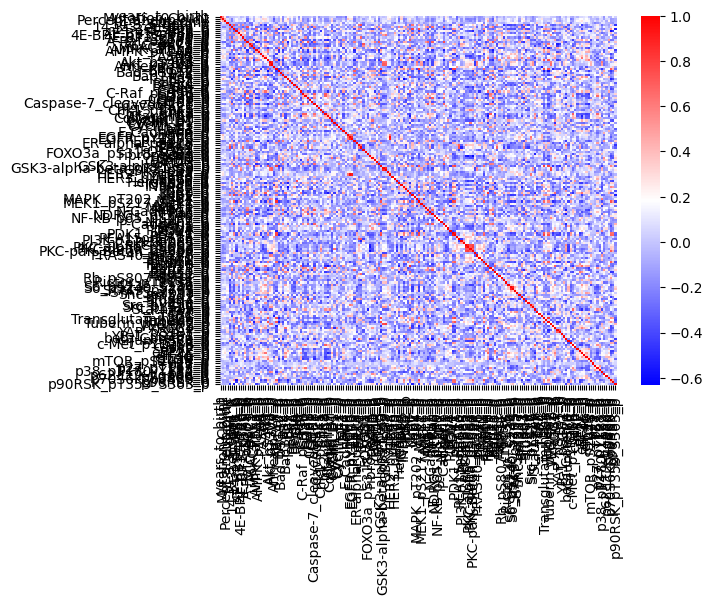

In [13]:
corr = data.corr(numeric_only=True) # Pearson Correlation

# Heatmap
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= 'bwr')

In [14]:
corr_df = corr.stack().reset_index() # Unstack correlation matrix

corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns

corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation

corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation

corr_df

,feature_1,feature_2,correlation
10400,EGFR_pY1068_p,HER2_pY1248_p,0.955629
13586,HER2_pY1248_p,EGFR_pY1068_p,0.955629
18794,PDK1_pS241_p,PDK1_p,0.924829
18617,PDK1_p,PDK1_pS241_p,0.924829
10578,EGFR_pY1173_p,HER2_pY1248_p,0.915553
...,...,...,...
3764,Akt_p,BRCA2_p,-0.606745
12039,Fibronectin_p,PKC-pan_BetaII_pS660_p,-0.611979
20181,PKC-pan_BetaII_pS660_p,Fibronectin_p,-0.611979
5422,Bax_p,INPP4B_p,-0.632894


In [15]:
correlated_features = corr_df[(corr_df['correlation'] >= 0.9) | (corr_df['correlation'] <= -0.9)]

correlated_features

,feature_1,feature_2,correlation
10400,EGFR_pY1068_p,HER2_pY1248_p,0.955629
13586,HER2_pY1248_p,EGFR_pY1068_p,0.955629
18794,PDK1_pS241_p,PDK1_p,0.924829
18617,PDK1_p,PDK1_pS241_p,0.924829
10578,EGFR_pY1173_p,HER2_pY1248_p,0.915553
13587,HER2_pY1248_p,EGFR_pY1173_p,0.915553
19868,PKC-alpha_pS657_p,PKC-alpha_p,0.915267
19691,PKC-alpha_p,PKC-alpha_pS657_p,0.915267


correlated >= abs 0.9
 8 features.

## Create Pipeline for Feature Transformation


#### Duplicates

In [16]:
# Count duplicates
duplicate_count = len(data) - len(data.drop_duplicates()) # Original data length minus data length without duplicates
duplicate_count

0

In [17]:
# no duplicates -> no drop 

#### Missing Values

In [18]:
values= round(data.isnull().sum().sort_values(ascending=False)/len(data),2) 

In [19]:
values.unique()

array([0.])

In [20]:
# non of the columns has missing values

In [21]:
data.iloc[:,:15].head()


,Case,years_to_birth,gender,histological_type,race,ethnicity,radiation_therapy,Grade,Mutation.Count,Percent.aneuploidy,IDH.status,outcome,14-3-3_beta_p,14-3-3_epsilon_p,14-3-3_zeta_p
0,TCGA-CS-4938,31,female,astrocytoma,white,not hispanic or latino,no,G2,15,0.069412,Mutant,1,0.026223,0.250940,-0.080954
1,TCGA-CS-6665,51,female,astrocytoma,white,not hispanic or latino,yes,G3,75,0.524814,Mutant,1,-0.002637,-0.340954,0.180070
2,TCGA-CS-6666,22,male,astrocytoma,white,not hispanic or latino,yes,G3,18,0.403165,Mutant,1,-0.071522,-0.288344,0.608584
3,TCGA-DB-5270,38,female,oligoastrocytoma,white,not hispanic or latino,no,G3,16,0.061382,Mutant,1,0.119700,0.269015,0.682819
4,TCGA-DB-5273,33,male,astrocytoma,white,not hispanic or latino,yes,G3,16,0.017349,Mutant,1,0.131162,0.086974,0.016835


In [22]:
prot_age_gen = data.drop(['Case', 'histological_type', 'race', 'ethnicity', 'radiation_therapy', 'Grade', 'Mutation.Count', 'Percent.aneuploidy', 'IDH.status', 'outcome'], axis = 1)

In [23]:
data['IDH.status'].unique()

array(['Mutant', 'WT'], dtype=object)

In [24]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn import set_config
set_config(display = 'diagram')

preproc_numerical = make_pipeline(
    MinMaxScaler()
)
preproc_categorical = make_pipeline(
    OrdinalEncoder()
) 
    

In [25]:
from sklearn.compose import make_column_transformer, make_column_selector
preproc_base = make_column_transformer(
    (preproc_categorical, ['gender']),
    (preproc_numerical, make_column_selector(dtype_include=["int64", "float64"]))
)

preproc_base

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['gender']),
                                ('pipeline-2',
                                 Pipeline(steps=[('minmaxscaler',
                                                  MinMaxScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0940d4d5a0>)])

In [26]:
X_preproc = preproc_base.fit_transform(prot_age_gen)

In [27]:
X_preproc.shape

(306, 176)

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [29]:
data.iloc[:, 12:179] = scaler.fit_transform(data.iloc[:, 12:179])

In [30]:
data.describe()

,years_to_birth,Mutation.Count,Percent.aneuploidy,outcome,14-3-3_beta_p,14-3-3_epsilon_p,14-3-3_zeta_p,4E-BP1_p,4E-BP1_pS65_p,4E-BP1_pT37_T46_p,...,p27_p,p27_pT157_p,p27_pT198_p,p38_pT180_Y182_p,p53_p,p62-LCK-ligand_p,p70S6K_p,p70S6K_pT389_p,p90RSK_p,p90RSK_pT359_S363_p
count,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,...,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000
mean,43.607843,28.009804,0.132947,0.601307,0.289740,0.476590,0.345012,0.436690,0.339127,0.507290,...,0.345729,0.234569,0.300439,0.031872,0.024308,0.014535,-0.027670,0.097176,-0.004954,0.000182
std,13.126489,14.908791,0.127883,0.490431,0.145132,0.151866,0.146832,0.152416,0.161308,0.185614,...,0.138374,0.097496,0.131999,0.382141,0.256175,0.287693,0.207015,0.871885,0.245806,0.180561
min,14.000000,0.000000,0.000006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-1.190789,-0.942777,-0.692843,-1.748935,-1.907725,-0.929916,-0.481472
25%,33.000000,18.000000,0.053388,0.000000,0.209918,0.386636,0.250226,0.332774,0.230260,0.390997,...,0.259018,0.181468,0.225928,-0.175519,-0.110476,-0.133928,-0.123099,-0.505027,-0.140920,-0.120984
50%,41.000000,24.000000,0.097433,1.000000,0.270718,0.459239,0.322753,0.420810,0.313906,0.517617,...,0.330647,0.222907,0.282705,0.047885,0.010180,-0.003165,-0.020563,-0.000169,0.006578,-0.013234
75%,53.000000,37.000000,0.163198,1.000000,0.333634,0.568281,0.417152,0.519636,0.417324,0.637161,...,0.409742,0.277634,0.352490,0.257276,0.170945,0.164749,0.081472,0.664052,0.150887,0.108412
max,86.000000,85.000000,0.821253,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.295985,1.660156,2.932249,0.694476,2.898134,0.724000,0.695240


In [31]:
clinical_data= ['Case', 'years_to_birth', 'gender', 'histological_type', 'race', 'ethnicity', 'radiation_therapy', 'Grade', 'Mutation.Count', 'Percent.aneuploidy', 'IDH.status', 'outcome' ]
proteins = 

SyntaxError: invalid syntax (1723556273.py, line 2)

In [ ]:
from sklearn.compose import make_column_transformer, make_column_selector
preproc_all = make_column_transformer(
    (preproc_categorical, ['gender', 'radiation_therapy','Grade', 'IDH.status']),
    (preproc_numerical, make_column_selector(dtype_include=["int64", "float64"]))
)

preproc_all

In [ ]:
X_preproc_all = preproc_all.fit_transform(prot_all)
X_preproc_all.shape

In [ ]:
prot_all = data.drop(['Case', 'histological_type', 'race', 'ethnicity','outcome'], axis = 1)
prot_all

## Preproc input data

In [33]:
df = pd.read_csv('../raw_data/brain_proteomics_data_input.csv')
df.head()

,Case,years_to_birth,gender,histological_type,race,ethnicity,radiation_therapy,Grade,Mutation.Count,Percent.aneuploidy,...,p27_p,p27_pT157_p,p27_pT198_p,p38_pT180_Y182_p,p53_p,p62-LCK-ligand_p,p70S6K_p,p70S6K_pT389_p,p90RSK_p,p90RSK_pT359_S363_p
0,TCGA-DU-8161,63,female,oligoastrocytoma,white,not hispanic or latino,yes,G3,45,0.263951,...,-0.411835,-0.078327,-0.074066,0.304173,-0.022757,0.124393,-0.278558,-0.155691,0.041023,0.182404
1,TCGA-DU-8165,60,female,oligodendroglioma,white,not hispanic or latino,yes,G3,60,0.498609,...,-0.127353,-0.179228,-0.313354,0.678381,0.138932,0.078294,-0.500670,-0.409388,-0.140238,-0.110519
2,TCGA-DU-A5TT,70,male,oligodendroglioma,white,not hispanic or latino,yes,G3,52,0.270027,...,-0.047207,-0.125626,0.004100,0.592724,0.441091,-0.176948,-0.071492,-0.237327,-0.059988,0.303594
3,TCGA-DU-A5TY,46,female,astrocytoma,white,not hispanic or latino,yes,G3,48,0.243986,...,-0.513945,-0.182054,0.020632,0.136934,-0.069103,0.515967,-0.099474,-0.986889,0.128458,-0.089121
4,TCGA-DU-A76K,86,male,oligodendroglioma,white,not hispanic or latino,yes,G2,46,0.217008,...,-0.005974,-0.118272,-0.085235,0.285611,0.110446,0.301417,-0.277094,-0.189774,0.252708,-0.054031


In [34]:
df = df.drop_duplicates()
df = df.dropna(how='any', axis=0)